## Introduction 
+ The data set seems to be about purchases in book store with following columns (meanings are explained below as per my understanding):-
1.  ChildBks  -- Book for Childerens
2.  YouthBks  -- Book for Youth
3.  CookBks   -- Book related to Cooking
4.  DoItYBks  -- Motivational Books
5.  RefBks    -- Book for Reference
6.  ArtBks    -- Book for Art
7.  GeogBks   -- Books related to geography
8.  ItalCook  -- Books related to Itlaian Cuisine
9.  ItalAtlas -- Books related to Itlaian Travel Guide
10. ItalArt   -- Books related to Itlaian Art
11. Florence  -- Books related to Italian city and commune, located in Tuscany 'Florence'

## Objective
+ We have to Prepare rule for the book Purchases
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

## Work Summary :- 
+ Used 'Apriori' algorithm to comeup with some assosiation relations.
+ Item lists are created for support value of 0.25, 0.2, 0.15 and 0.10
+ For Single 'antecedents' coorosponding to 'support' value 0.25, 0.2 and 0.15 Tree map visualiztion is used.
    + Most relevant relationship was selected based on 'confidence' and 'lift' value.
    + Further Venn Diagram was used to visualize every finalized relation seperatly
+ For support = 0.10 only relation with more than one 'antecedents' was selected 
    + Final relationship was established based on an genetarted column to ensure only relations with more than one 'antecedents' is seleceted

In [16]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
## Libraries to establish assosiation rule
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
## Visualiztion Library Imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
books = pd.read_csv("book.csv")

In [4]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
books.shape

(2000, 11)

In [6]:
books.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [7]:
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
book_types = list(books.columns)
book_types

['ChildBks',
 'YouthBks',
 'CookBks',
 'DoItYBks',
 'RefBks',
 'ArtBks',
 'GeogBks',
 'ItalCook',
 'ItalAtlas',
 'ItalArt',
 'Florence']

## Changing the data type into bool type

In [9]:
data = books.iloc[:].astype('bool')
data.head(3)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,True,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [11]:
data.dtypes

ChildBks     bool
YouthBks     bool
CookBks      bool
DoItYBks     bool
RefBks       bool
ArtBks       bool
GeogBks      bool
ItalCook     bool
ItalAtlas    bool
ItalArt      bool
Florence     bool
dtype: object

# Data Mining to Identify rules

## Frequently Bought Item list :- 
+ We have records of a total = 2000 tranctions.
+ 1. For our evaluation we shall consider items corrosponding to every 500th Purchases.
+ Hence the support value for Data Mining shall be 0.25

In [12]:
freq_25 = apriori(data,min_support=0.25,use_colnames=True) # Items corrosponding to minimum 500 Purchases

+ Item sets for min_support = 0.25

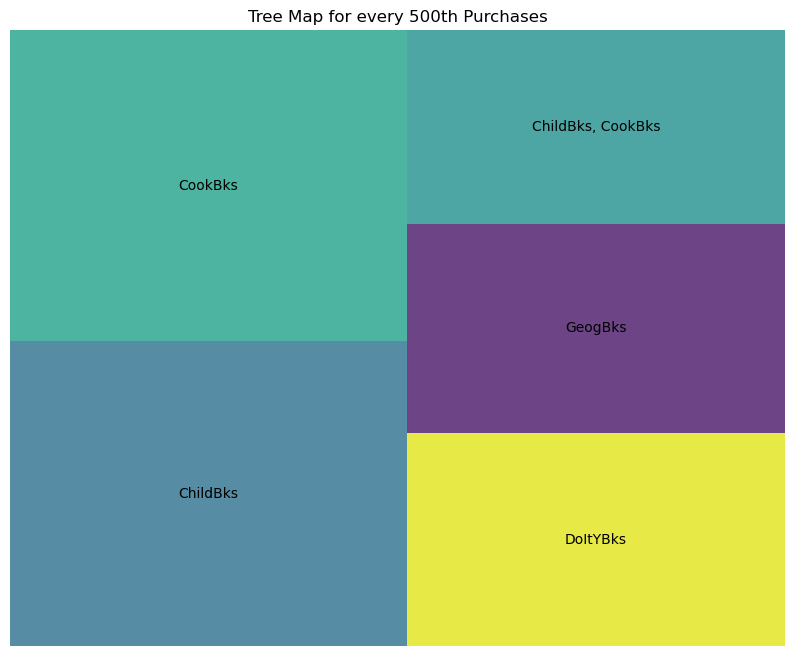

In [17]:
import squarify
plt.figure(figsize=(10,8))
squarify.plot(sizes =freq_25['support'],label=freq_25['itemsets'].apply(lambda x: ', '.join(list(x))),alpha=0.8)
plt.title('Tree Map for every 500th Purchases')
plt.axis('off')
plt.show()

## For support = 0.25 and confidence = 0.6

In [14]:
rules_25 = association_rules(freq_25,min_threshold=0.6)
rules_25

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


### Venn-Diagram for the Assosiation Rule Found :- 

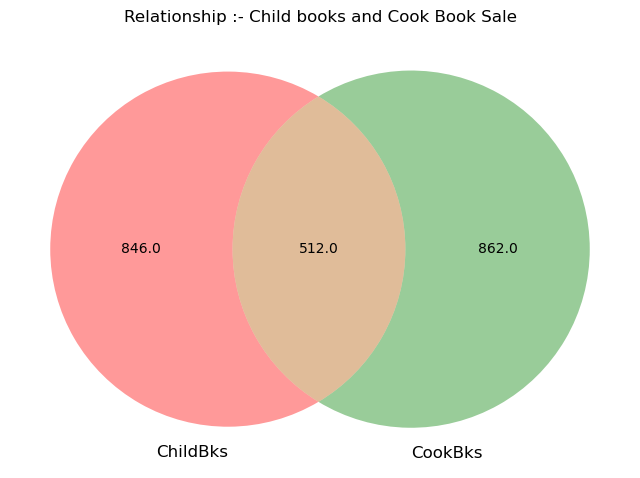

In [15]:
from matplotlib_venn import venn2
plt.figure(figsize=(8, 6))
supports = [2000*.423,2000*0.431,2000*0.256] ## Total number of books bought = 2000*support (for each case)
labels = ['ChildBks','CookBks']
venn2(subsets=supports,set_labels=labels)
plt.title('Relationship :- Child books and Cook Book Sale')
plt.show()

## The Rule that can be concluded from the above analysis considering the magnitude of 
##### Minimum Support = 0.25, Maximum confidence = 0.6 and lift = 1.404179 is :- 
+ The Sales of Child Books imply the high likelyhood of sale of Cook Books

## 2. We evaluate every 400th Transaction

In [18]:
freq_20 = apriori(df = data, min_support=0.2,use_colnames=True)

In [19]:
freq_20

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


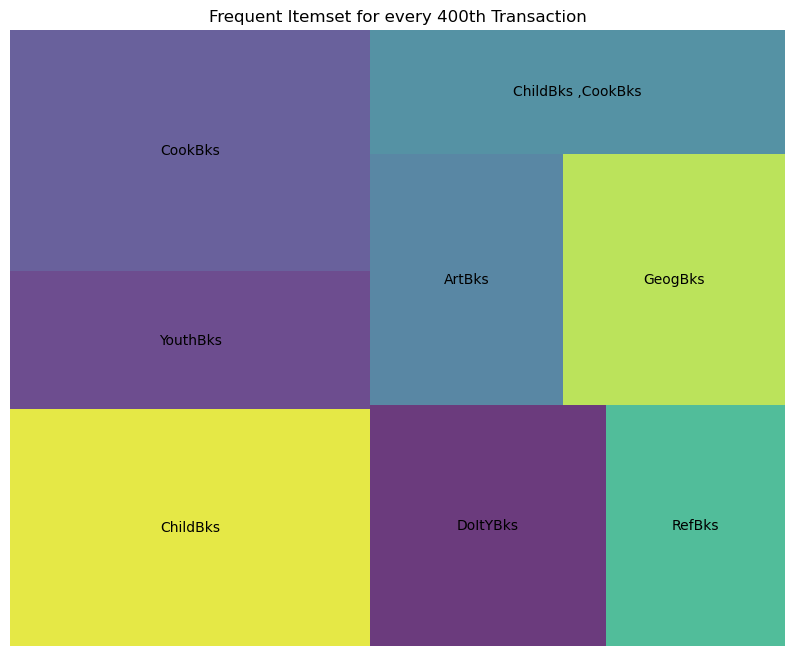

In [20]:
plt.figure(figsize=(10,8))
squarify.plot(sizes =freq_20['support'],label=freq_20['itemsets'].apply(lambda x:" ,".join(list(x))),alpha = 0.8)
plt.title("Frequent Itemset for every 400th Transaction")
plt.axis('off')
plt.show()

In [21]:
rule_20 = association_rules(freq_20,min_threshold=0.6)
rule_20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


## It's clear that no new rule will be found here. Hence leaving this analysis

## 3. we explore every 300th Transactions i.e. the min_support = 0.15

In [22]:
freq_15 = apriori(data, min_support= 0.15, use_colnames=True)

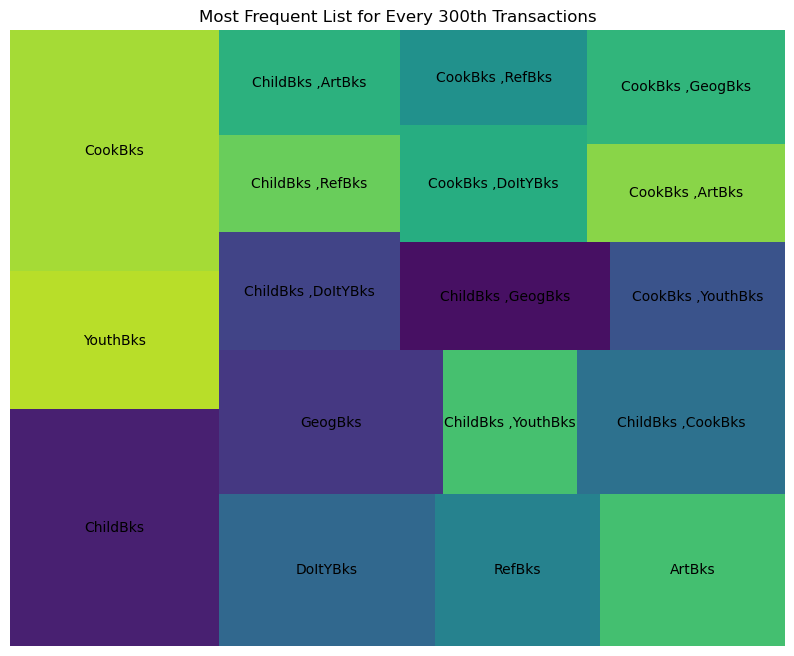

In [23]:
plt.figure(figsize=(10,8))
squarify.plot(freq_15['support'], label = freq_15['itemsets'].apply(lambda x: " ,".join(list(x))))
plt.title("Most Frequent List for Every 300th Transactions")
plt.axis("off")
plt.show()

## From the Treemap we can see that there are 11 possible assosiation rules for this support value. So in order to select the most relevent assosiation rule :- 

+ Confidence = 0.7 and lift > 1.65

In [24]:
rule_15 = association_rules(freq_15,metric='lift',min_threshold=1.65)

In [25]:
rule_15 = rule_15[rule_15['confidence']>=0.7]

In [26]:
rule_15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
3,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271


### 1. Venn Diagram for the 'RefBks' and 'ChildBks'

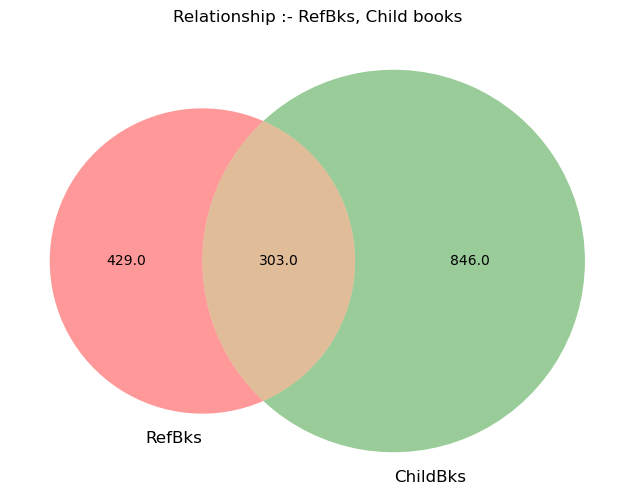

In [27]:
plt.figure(figsize=(8, 6))
supports = [2000*0.2145,2000*0.423,2000*0.1515] ## Total number of books bought = 2000*support
labels = ['RefBks','ChildBks']
venn2(subsets=supports,set_labels=labels)
plt.title('Relationship :- RefBks, Child books')
plt.show()

### 2. Venn Diagram for the 'GeogBks' and 'ChildBks'

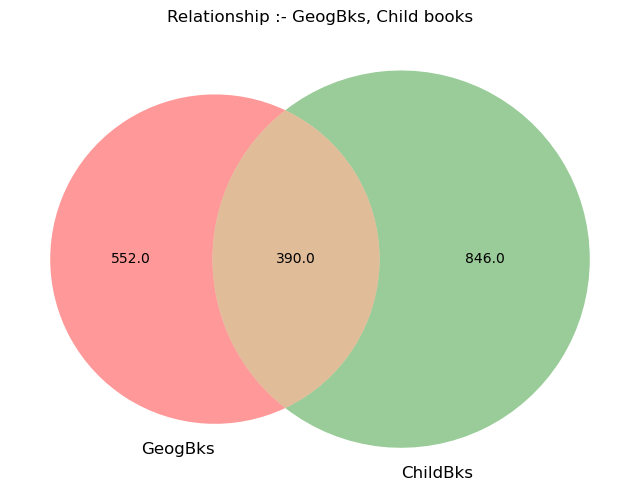

In [28]:
plt.figure(figsize=(8, 6))
supports = [2000*0.2760,2000*0.423,2000*0.1950] ## Total number of books bought = 2000*support
labels = ['GeogBks','ChildBks']
venn2(subsets=supports,set_labels=labels)
plt.title('Relationship :- GeogBks, Child books')
plt.show()

## 4. We explore every 200th Transactions :- i.e. min_support = 0.10
+ We already have 3 rules for one antecedent now we explore rules with atleast two antecedents

In [29]:
freq_10 = apriori(data,min_support = 0.10, use_colnames=True)

## Selection of relevent association rules

In [30]:
rule_10 = association_rules(df = freq_10,metric='lift',min_threshold = 1.2)
rule_10['antecedents_length'] = rule_10['antecedents'].apply(lambda x:len(x))
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714,1
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856,1
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870,1
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543,1
...,...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,2
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602,2
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355,1
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114,1


### Filtering the rules

In [31]:
rule_10 = rule_10[ (rule_10['antecedents_length'] >= 2) &
       (rule_10['confidence'] > 0.81) &
       (rule_10['lift'] > 1.65) ]
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591,2
89,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010,2
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602,2


### Since the 'antecedent support' is much less as compare to the 'consequent support' we only select the rule with maximum lift

In [32]:
rule_10 = rule_10[ (rule_10['antecedents_length'] >= 2) &
       (rule_10['confidence'] > 0.81) &
       (rule_10['lift'] > 1.9) ]
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591,2


### We can see that eventhough the 'antecedent support' is not too high. A very high value of 'confidence' and  'lift' value indicate that the mentioned assosiation relationship worths the consideration

# Conclusion :- 
+ The Rules obtained from above data mining are :-

In [33]:
rules_25

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


## This rule is selected because :-
+ Out of Total 846 purchaces of 'Childbks' 512 Purchases also included Purchase of 'CookBks' 

In [34]:
rule_15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
3,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271


## This rule is selected because :-
+ Out of Total 429 purchaces of 'RefBks' 303 Purchases were included Purchase of 'ChildBks' and 
+ Out of Total 552 purchaces of 'GeogBks' 390 Purchases were included Purchase of 'ChildBks'

In [35]:
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591,2


## This rule is selected because :-
+ Out of Total 247 purchaces of 'DoItYBks and ArtBks' 203 Purchases also included Purchase of 'CookBks' 